In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random as rnd
from scipy.stats import norm,skew


In [21]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
combined=pd.concat([train,test],axis=0,sort=False)

In [22]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#Categorical-Survived,Sex and Embarked
#Ordinal-Pclass
#Discerete-SibSp,Parch
#Continous-Age,Fare
#Mixed-Ticket,Cabin
#Feature that may contain errors

String
* Categorical-Survived,Sex and Embarked
* Ordinal-Pclass

Numeric 
* Discreet-Sibsp,Parch
* Continious-Age,Fare

Mixed
* Ticket,Cabin

May contain Error
* Name



In [25]:
train.info()
print("_"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [26]:
#Null Values in Train
#Age,Cabin,Embarked
#Null Values in Test
#Age,Fare,Cabin

In [27]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [28]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [29]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [31]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).sum().sort_values(by='Survived',ascending=False)

,Parch,Survived
0,0,233
1,1,65
2,2,40
3,3,3
5,5,1
4,4,0
6,6,0


### Data Visualisation

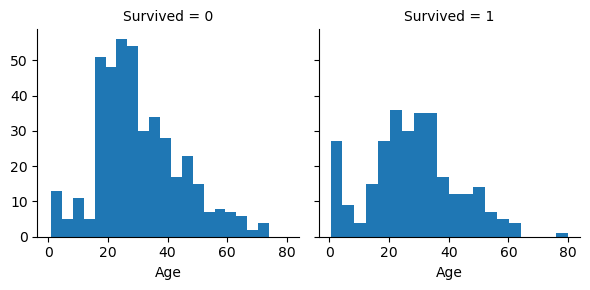

In [33]:
#Age
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

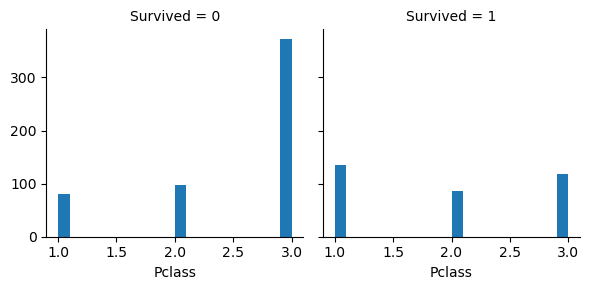

In [35]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Pclass',bins=20)

<Axes: xlabel='Sex', ylabel='Survived'>

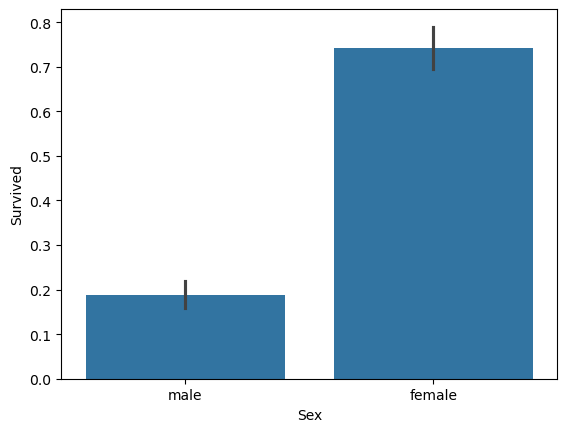

In [38]:
sns.barplot(x='Sex',y='Survived',data=train)